# Part 1 : preparing dataset for time series analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import glob

folder = "Data/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [4]:
# set datetime index
df['Date'] = pd.to_datetime(df['Date'])
# set Date as an index
df = df.set_index('Date')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [5]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Primary Type'].value_counts().to_frame('Total # of Crimes')
crime_counts

,Total # of Crimes
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958
ROBBERY,289677


In [6]:
# get the total counts for each crime (Each row is 1 day)

## get list of  unique crime descriptions
crime_list = df['Primary Type'].unique()

# Create an empty dictionary  
CRIMES = {}

# Loop through the list of crimes
for crime in crime_list:
    # Save a temp df of just the rows that match the crime
    temp = df.loc[ df['Primary Type']==crime].copy()
    # Resample the temp DataFrame as Daily data (crime counts) and keep ONLY the .size() 
    temp_res = temp.resample("D").size() 
    # Save the temporary DataFrame in the dictionary, using the crime Primary Type as the key.
    CRIMES[crime] = temp_res.copy() 

# Convert Dictionary to DataFrame
crimes_ts = pd.DataFrame(CRIMES)
crimes_ts

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,296,2.0,233,100,412,70,97,38.0,94,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,143,1.0,118,4,221,66,175,2.0,78,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,165,0.0,136,3,226,79,133,7.0,49,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,173,2.0,133,5,243,57,142,2.0,42,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,178,0.0,142,9,265,68,185,6.0,53,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,76,NaN,64,4,147,47,9,NaN,40,12,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2022-12-28,102,NaN,78,3,112,44,12,NaN,38,17,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2022-12-29,97,NaN,95,3,137,38,15,NaN,38,11,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [7]:
# filling null values in crimes_ts with 0 
crimes_ts = crimes_ts.fillna(0)

## Topic 1) Comparing Police Districts

- Which district had the most crimes in 2022?
- Which had the least?

In [8]:
# obtain the counts of crimes for each discrit in 2022 
crime_count = df.loc['2022'].groupby('District')['Primary Type'].count()
# Sort from highest to lowest
crime_count.sort_values(ascending = False)

District
8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: Primary Type, dtype: int64

-  Which district had the most crimes in 2022?
   - 8
-  Which had the least?
   - 31

## Topic 2) Crimes Across the Years:
-   Is the total number of crimes increasing or decreasing across the years?
-   ?
Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-vers
  a)?

In [9]:
# resample total crimes by year using sum as aggregate
crimes_ts_year = crimes_ts.resample('Y').sum()
crimes_ts_year 

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,93461,934.0,55859,2263,99277,31384,50567,1779.0,14949,4277,...,8.0,1.0,19.0,6.0,9.0,1.0,0.0,0.0,0.0,0.0
2002-12-31,94153,971.0,55941,2594,98332,31523,51789,1807.0,13732,4281,...,2.0,0.0,26.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0
2003-12-31,88380,1088.0,55011,3047,98876,29477,54288,1571.0,13459,4211,...,2.0,0.0,16.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0
2004-12-31,87136,1122.0,53164,3099,95463,28850,57060,1538.0,13255,4298,...,1.0,0.0,13.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0
2005-12-31,83964,1078.0,54548,2906,85684,27067,56234,1521.0,13590,4106,...,2.0,0.0,19.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0
2006-12-31,80666,1368.0,57124,2783,86240,25945,55813,1439.0,13606,3821,...,7.0,0.0,17.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0
2007-12-31,79593,1409.0,53749,2921,85156,26313,54454,1507.0,14170,3554,...,1.0,0.0,12.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0
2008-12-31,75930,1199.0,52843,2661,88437,25448,46506,1515.0,14933,3877,...,0.0,0.0,13.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0
2009-12-31,68460,991.0,47725,2632,80976,22861,43542,1401.0,13877,4159,...,0.0,0.0,21.0,7.0,10.0,0.0,1.0,0.0,0.0,0.0


<Axes: xlabel='Date'>

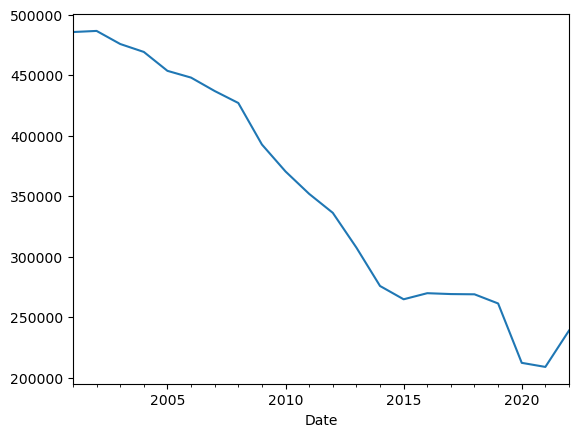

In [10]:
# plot the total number of crimes across the years
crimes_ts_year.sum(axis=1).plot()

Q1 : Is the total number of crimes increasing or decreasing across the years?

- overall the number of crimes is decreasing across the years

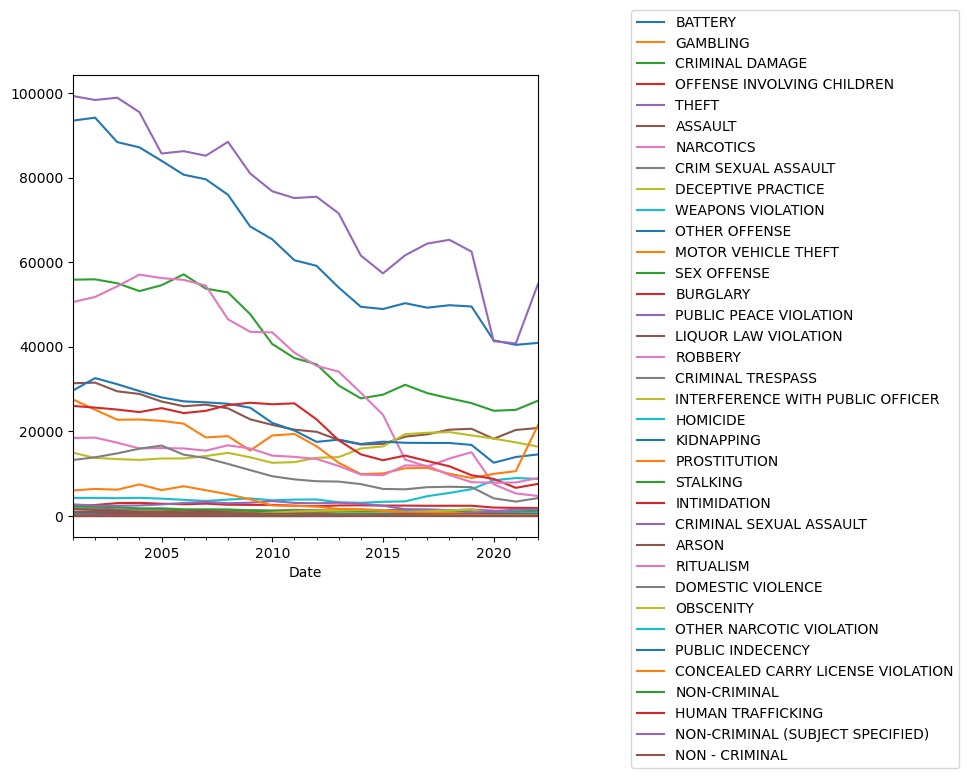

In [11]:
# plot the number of each crime across the years
fig, ax= plt.subplots(figsize = (6,6))
crimes_ts_year.plot(ax=ax)
ax.legend(loc=(1.2, -0.5))

Q2 : Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-vers a)?
- it seems that crimes with primary type'other narcotic violation' are slightly increasing from 2016

## Topic 3) Comparing AM vs. PM Rush Hour:

-  Are crimes more common during AM rush hour or PM rush hour
    -  You can consider any crime that occurred between 7 AM - 10 AM as AM rush ho
    -  You can consider any crime that occurred between 4 - 7 PM as PM rush ho

- Answer the question: ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush h
- Answer the question: ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [12]:
# make a copy of the original data 
df_copy = df.copy()
# create a column with just the hour
df_copy['hour']= df_copy.index.hour
df_copy.head(2)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,hour
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,13


In [13]:
# Filter crimes occured in AM rush hour
AM_rush_hour = df_copy['hour'].isin(range(7,11))
# Filter crimes occured in PM rush hour
PM_rush_hour = df_copy['hour'].isin(range(16,20))

In [28]:
# Obtain the number of crimes occured in AM rush hours
len(df_copy[AM_rush_hour])

1097647

In [29]:
# Obtain the number of crimes occured in PM rush hours 
len(df_copy[PM_rush_hour])

1641051

Q1-a: Are crimes more common during AM rush hour or PM rush hour?
- it seems that crimes are more common during PM rush hour 

In [30]:
# Obtain the number of crimes occured in AM rush hours grouped by their type
df_copy[AM_rush_hour].groupby('Primary Type').size().sort_values(ascending = False)

Primary Type
THEFT                                260759
BATTERY                              158475
CRIMINAL DAMAGE                      109089
BURGLARY                              96219
OTHER OFFENSE                         89870
DECEPTIVE PRACTICE                    80006
ASSAULT                               73636
NARCOTICS                             67032
MOTOR VEHICLE THEFT                   54035
CRIMINAL TRESPASS                     30493
ROBBERY                               26337
PROSTITUTION                          12215
OFFENSE INVOLVING CHILDREN             8835
WEAPONS VIOLATION                      8435
PUBLIC PEACE VIOLATION                 5460
SEX OFFENSE                            5005
CRIM SEXUAL ASSAULT                    2567
KIDNAPPING                             1649
INTERFERENCE WITH PUBLIC OFFICER       1380
ARSON                                  1139
HOMICIDE                               1133
STALKING                                928
INTIMIDATION       

In [18]:
# Obtain the number of crimes occured in PM rush hours grouped by their type
df_copy[PM_rush_hour].groupby('Primary Type').size().sort_values(ascending = False)

Primary Type
THEFT                                379122
BATTERY                              288003
CRIMINAL DAMAGE                      183423
NARCOTICS                            164754
ASSAULT                              118179
OTHER OFFENSE                         98687
BURGLARY                              78604
MOTOR VEHICLE THEFT                   74678
ROBBERY                               61775
DECEPTIVE PRACTICE                    58973
CRIMINAL TRESPASS                     48564
WEAPONS VIOLATION                     20485
OFFENSE INVOLVING CHILDREN            13278
PUBLIC PEACE VIOLATION                12135
PROSTITUTION                           8125
SEX OFFENSE                            5865
GAMBLING                               4905
INTERFERENCE WITH PUBLIC OFFICER       4403
LIQUOR LAW VIOLATION                   4168
CRIM SEXUAL ASSAULT                    3874
HOMICIDE                               2227
KIDNAPPING                             2092
ARSON              

Q2-a: What are the top 5 most common crimes during AM rush hour? 
- THEFT, BATTERY, CRIMINAL DAMAGE, BURGLARY, OTHER OFFENSE

Q2-b:What are the top 5 most common crimes during PM rush hour?
- THEFT, BATTERY, CRIMINAL DAMAGE, NARCOTICS, ASSAULT

Q3: Answer the question: ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
- The number of MOTOR VEHICLE THEFT crimes is more common in PM rush hour (74678 in PM rush hour compared to 54035 in AM rush hour).